1. Libraries
2. Import Model
3. Import Processor
4. Prompt, import image
5. Inference

## ***Install Required Libraries***

In [1]:
!pip install numpy==1.24.4 Pillow==10.3.0 Requests==2.31.0 torch==2.3.0 torchvision==0.18.0 transformers==4.40.2

In [2]:
!pip install accelerate

In [3]:
!mkdir my_models
!mkdir my_models/phi_3_vision

## ***Import Phi-3-vision model***

In [4]:
from transformers import AutoModelForCausalLM

model_id = "microsoft/Phi-3-vision-128k-instruct"

model = AutoModelForCausalLM.from_pretrained(model_id,
                                             cache_dir="/content/my_models/phi_3_vision",
                                             device_map="cuda",
                                             trust_remote_code=True,
                                             torch_dtype="auto",
                                             _attn_implementation="eager")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/3.66k [00:00<?, ?B/s]

configuration_phi3_v.py:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-vision-128k-instruct:
- configuration_phi3_v.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_phi3_v.py:   0%|          | 0.00/75.4k [00:00<?, ?B/s]

image_embedding_phi3_v.py:   0%|          | 0.00/14.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-vision-128k-instruct:
- image_embedding_phi3_v.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-vision-128k-instruct:
- modeling_phi3_v.py
- image_embedding_phi3_v.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model.safetensors.index.json:   0%|          | 0.00/68.9k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.35G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
# model.config

## ***Get the Processor***

In [5]:
from transformers import AutoProcessor
processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/464 [00:00<?, ?B/s]

processing_phi3_v.py:   0%|          | 0.00/11.3k [00:00<?, ?B/s]

image_processing_phi3_v.py:   0%|          | 0.00/11.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-vision-128k-instruct:
- image_processing_phi3_v.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-vision-128k-instruct:
- processing_phi3_v.py
- image_processing_phi3_v.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer_config.json:   0%|          | 0.00/9.40k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.85M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/670 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [6]:
print(processor.__doc__)


    Constructs a Phi3-V processor which wraps a Phi3-V image processor and a LLaMa tokenizer into a single processor.

    [`Phi3VProcessor`] offers all the functionalities of [`Phi3VImageProcessor`] and [`LlamaTokenizerFast`]. See the
    [`~Phi3VProcessor.__call__`] and [`~Phi3VProcessor.decode`] for more information.

    Args:
        image_processor ([`Phi3VImageProcessor`], *optional*):
            The image processor is a required input.
        tokenizer ([`LlamaTokenizerFast`], *optional*):
            The tokenizer is a required input.
    


In [7]:
user_question_1 = input("Enter the first question: ")
user_question_2 = input("Enter the second question: ")
user_question_3 = input("Enter the third question: ")

Enter the first question: How many persons are there under the Queens Tower named roof? 
Enter the second question: What is the model of navy blue car ?
Enter the third question: What is the color of the shirt the person is wearing beside navy blue car?


## ***Create Prompt***

In [8]:
# Prepare the messages with user input
messages = [
    {
        "role": "user",
        "content": f"<|image_1|>\n1.) {user_question_1} 2.) {user_question_2} 3.) {user_question_3}"
    }
]

# Create a prompt from the user-provided questions
prompt = processor.tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
print(f"\nGenerated Prompt: {prompt}")


Generated Prompt: <|user|>
<|image_1|>
1.) How many persons are there under the Queens Tower named roof?  2.) What is the model of navy blue car ? 3.) What is the color of the shirt the person is wearing beside navy blue car?<|end|>
<|assistant|>



In [9]:
prompt

'<|user|>\n<|image_1|>\n1.) How many persons are there under the Queens Tower named roof?  2.) What is the model of navy blue car ? 3.) What is the color of the shirt the person is wearing beside navy blue car?<|end|>\n<|assistant|>\n'

## ***Fetch Input Image***

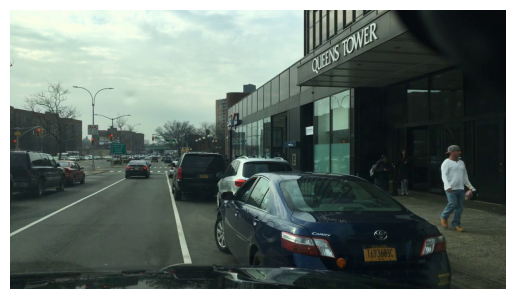

In [10]:
import matplotlib.pyplot as plt
from PIL import Image
import requests

url = "https://drive.google.com/uc?export=view&id=1T-qnWzsdokXMQe0KJmdJgfUmrNTWsj7-"
image = Image.open(requests.get(url, stream=True).raw)
image.show()

plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()


## ***Convert Inputs to Tokens***

In [11]:
inputs = processor(prompt, [image], return_tensors="pt").to("cuda:0")

In [12]:
inputs

{'input_ids': tensor([[    1, 32010, 29871,  ..., 29871,    13, 32001]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1]], device='cuda:0'), 'pixel_values': tensor([[[[[ 1.9303,  1.9303,  1.9303,  ...,  1.9303,  1.9303,  1.9303],
           [ 1.9303,  1.9303,  1.9303,  ...,  1.9303,  1.9303,  1.9303],
           [ 1.9303,  1.9303,  1.9303,  ...,  1.9303,  1.9303,  1.9303],
           ...,
           [ 1.9303,  1.9303,  1.9303,  ...,  1.9303,  1.9303,  1.9303],
           [ 1.9303,  1.9303,  1.9303,  ...,  1.9303,  1.9303,  1.9303],
           [ 1.9303,  1.9303,  1.9303,  ...,  1.9303,  1.9303,  1.9303]],

          [[ 2.0749,  2.0749,  2.0749,  ...,  2.0749,  2.0749,  2.0749],
           [ 2.0749,  2.0749,  2.0749,  ...,  2.0749,  2.0749,  2.0749],
           [ 2.0749,  2.0749,  2.0749,  ...,  2.0749,  2.0749,  2.0749],
           ...,
           [ 2.0749,  2.0749,  2.0749,  ...,  2.0749,  2.0749,  2.0749],
           [ 2.0749,  2.0749,  2.0749,  ...,  2.0749,  2.0

In [13]:
generation_args = {
    "max_new_tokens": 500,
    "temperature": 0.0,
    "do_sample": False,
}

## ***Inference***

In [14]:
%%time
generate_ids = model.generate(**inputs, eos_token_id=processor.tokenizer.eos_token_id, **generation_args)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:492: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/root/.cache/huggingface/modules/transformers_modules/microsoft/Phi-3-vision-128k-instruct/c45209e90a4c4f7d16b2e9d48503c7f3e83623ed/image_embedding_phi3_v.py:197: UserWarning: Phi-3-V modifies `input_ids` in-place and the tokens indicating images will be removed after model forward. If your workflow requires multiple forward passes on the same `input_ids`, please make a copy of `input_ids` before passing it to the model.
  warnings.warn(


CPU times: user 14.1 s, sys: 215 ms, total: 14.3 s
Wall time: 17.2 s


In [15]:
# remove input tokens
generate_ids = generate_ids[:, inputs['input_ids'].shape[1]:]
response = processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]

print(response)

1. There are two persons under the Queens Tower named roof. 2. The model of the navy blue car is Toyota Camry. 3. The color of the shirt the person is wearing beside the navy blue car is white.
